# Data Science Job salary prediction using ML

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

In [2]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [4]:
# check the null value
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


# data preprocess 

In [6]:
# drop salary column, salary_currency because there's salary in usd
df.drop(columns=['salary', 'salary_currency'], inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [7]:
# check the number of unique value on object datatype
df.select_dtypes(include='object').nunique()

experience_level       4
employment_type        4
job_title             93
employee_residence    78
company_location      72
company_size           3
dtype: int64

In [9]:
# categorize the job title
df.job_title.unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [11]:
def segment_job_title(job_title):
    data_scientist_titles = ['Principal Data Scientist', 'Data Scientist', 'Applied Scientist', 'Research Scientist', 'Applied Data Scientist', 'Lead Data Scientist', 'Staff Data Scientist',  ]
    machine_learning_titles = ['ML Engineer', 'Machine Learning Engineer', 'Applied Machine Learning Engineer', 'Machine Learning Researcher', 'Machine Learning Scientist', 'Autonomous Vehicle Technician', 'Applied Machine Learning Scientist', 'Principal Machine Learning Engineer', 'Machine Learning Developer', 'Lead Machine Learning Engineer', 'Machine Learning Manager']
    data_analyst_titles = ['Data Analyst','Data Analytics Manager','Principal Data Analyst', 'Data Quality Analyst', 'Compliance Data Analyst', 'Business Data Analyst', 'Staff Data Analyst', 'Lead Data Analyst', 'BI Data Analyst', 'Marketing Data Analyst', 'Finance Data Analyst']
    data_engineer_titles = ['Principal Data Engineer','Data Modeler', 'Data Engineer', 'ETL Engineer', 'Data DevOps Engineer', 'Big Data Engineer', 'Data Infrastructure Engineer', 'Software Data Engineer', 'Cloud Database Engineer', 'Cloud Data Engineer', 'Cloud Data Architect', 'Lead Data Engineer', 'Principal Data Engineer']
    bi_analytics_titles = [ 'Business Intelligence Engineer', 'Analytics Engineer', 'BI Data Engineer', 'Director of Data Science', 'BI Developer', 'Insight Analyst', 'Data Analytics Specialist', 'Data Analytics Lead', 'Power BI Developer', 'Cloud Data Architect']
    other_titles = ['Data Strategist', 'Computer Vision Engineer', 'AI Developer', 'Head of Data']

    if job_title in data_scientist_titles:
        return 'Data Scientist'
    elif job_title in machine_learning_titles:
        return 'Machine Learning Engineer'
    elif job_title in data_analyst_titles:
        return 'Data Analyst'
    elif job_title in data_engineer_titles:
        return 'Data Engineer'
    elif job_title in bi_analytics_titles:
        return 'Business Intelligence and Analytics'
    elif job_title in other_titles:
        return 'Other'
    else:
        return 'Uncategorized'

In [12]:
df['job_title'] = df['job_title'].apply(segment_job_title)

<Axes: xlabel='job_title'>

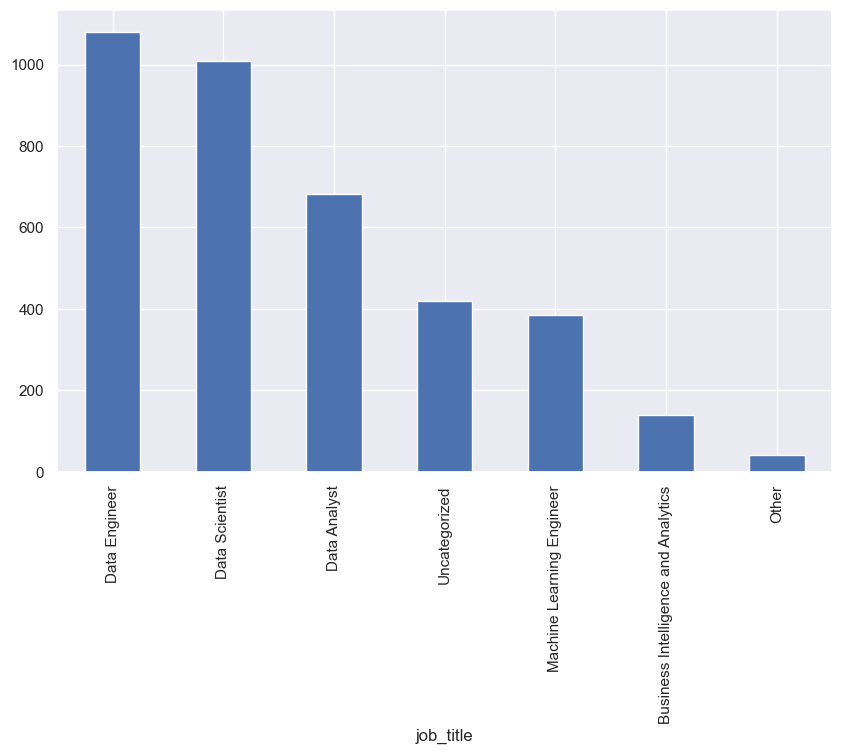

In [13]:
plt.figure(figsize=(10,6))
df['job_title'].value_counts().plot(kind='bar')

In [14]:
# categories employee residence
df.employee_residence.unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH',
       'CF', 'FR', 'AU', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG',
       'SE', 'SI', 'MX', 'UZ', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY',
       'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA',
       'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL',
       'PR', 'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE',
       'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU',
       'MT'], dtype=object)

In [15]:
# Define a function to categorize the unique values
def categorize_region(country):
    if country in ['DE', 'GB', 'PT', 'NL', 'CH', 'CF', 'FR', 'FI', 'UA', 'IE', 'AT', 'SG', 'SE', 'SI', 'UZ', 'HR', 'PL', 'CY', 'AM', 'BA', 'GR', 'MK', 'LV', 'RO', 'IT', 'MA', 'LT', 'BE', 'AS', 'HU', 'SK', 'CZ', 'JE', 'RS', 'MD', 'LU', 'MT']:
        return 'Europe'
    elif country in ['US', 'CA', 'MX']:
        return 'North America'
    elif country in ['BR', 'AR', 'CL', 'BO', 'CR', 'DO', 'PR', 'HN', 'UY']:
        return 'South America'
    elif country in ['NG', 'GH', 'KE', 'TN', 'DZ']:
        return 'Africa'
    elif country in ['HK', 'IN', 'CN', 'JP', 'KR', 'BD', 'VN', 'PH', 'MY', 'ID', 'AE']:
        return 'Asia'
    elif country in ['AU', 'NZ']:
        return 'Oceania'
    else:
        return 'Unknown'

# Apply the function to the "employee residence" column to create a new column with the categorized values
df['employee_residence'] = df['employee_residence'].apply(categorize_region)

<Axes: xlabel='employee_residence'>

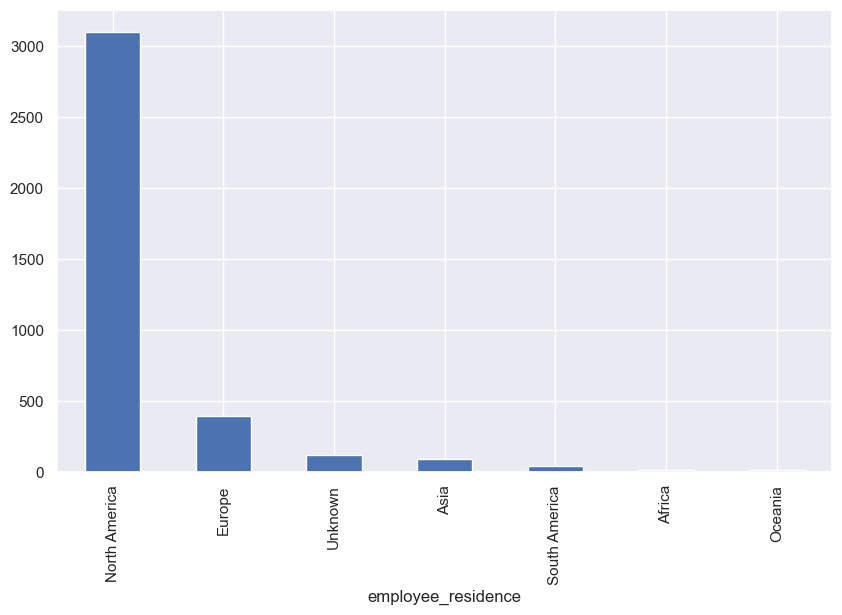

In [16]:
plt.figure(figsize=(10,6))
df['employee_residence'].value_counts().plot(kind='bar')

In [17]:
# categorize the company location
df.company_location.unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [18]:
# Define a function to categorize the unique values
def categorize_region(country):
    if country in ['DE', 'GB', 'PT', 'NL', 'CH', 'CF', 'FR', 'FI', 'UA', 'IE', 'AT', 'SG', 'SE', 'SI', 'UZ', 'HR', 'PL', 'CY', 'AM', 'BA', 'GR', 'MK', 'LV', 'RO', 'IT', 'MA', 'LT', 'BE', 'AS', 'HU', 'SK', 'CZ', 'JE', 'RS', 'MD', 'LU', 'MT']:
        return 'Europe'
    elif country in ['US', 'CA', 'MX']:
        return 'North America'
    elif country in ['BR', 'AR', 'CL', 'BO', 'CR', 'DO', 'PR', 'HN', 'UY']:
        return 'South America'
    elif country in ['NG', 'GH', 'KE', 'TN', 'DZ']:
        return 'Africa'
    elif country in ['HK', 'IN', 'CN', 'JP', 'KR', 'BD', 'VN', 'PH', 'MY', 'ID', 'AE']:
        return 'Asia'
    elif country in ['AU', 'NZ']:
        return 'Oceania'
    else:
        return 'Unknown'

# Apply the function to the "company_location" column to create a new column with the categorized values
df['company_location'] = df['company_location'].apply(categorize_region)

<Axes: xlabel='company_location'>

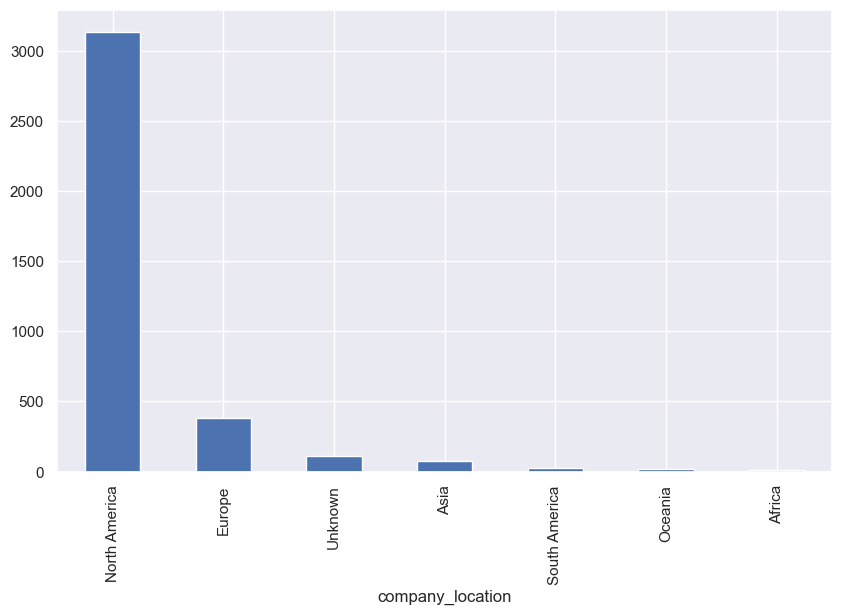

In [19]:
plt.figure(figsize=(10,6))
df['company_location'].value_counts().plot(kind='bar')

In [20]:
# check the number of unique on object data types
df.select_dtypes(include='object').nunique()

experience_level      4
employment_type       4
job_title             7
employee_residence    7
company_location      7
company_size          3
dtype: int64

# Exploratory data analysis

In [22]:
df['remote_ratio'].unique()

array([100,   0,  50], dtype=int64)

C:\Users\Shehan\AppData\Local\Temp\ipykernel_30452\1255583922.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
C:\Users\Shehan\AppData\Local\Temp\ipykernel_30452\1255583922.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
C:\Users\Shehan\AppData\Local\Temp\ipykernel_30452\1255583922.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
C:\Users\Shehan\AppData\Local\Temp\ipykernel_30452\1255583922.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xtickla

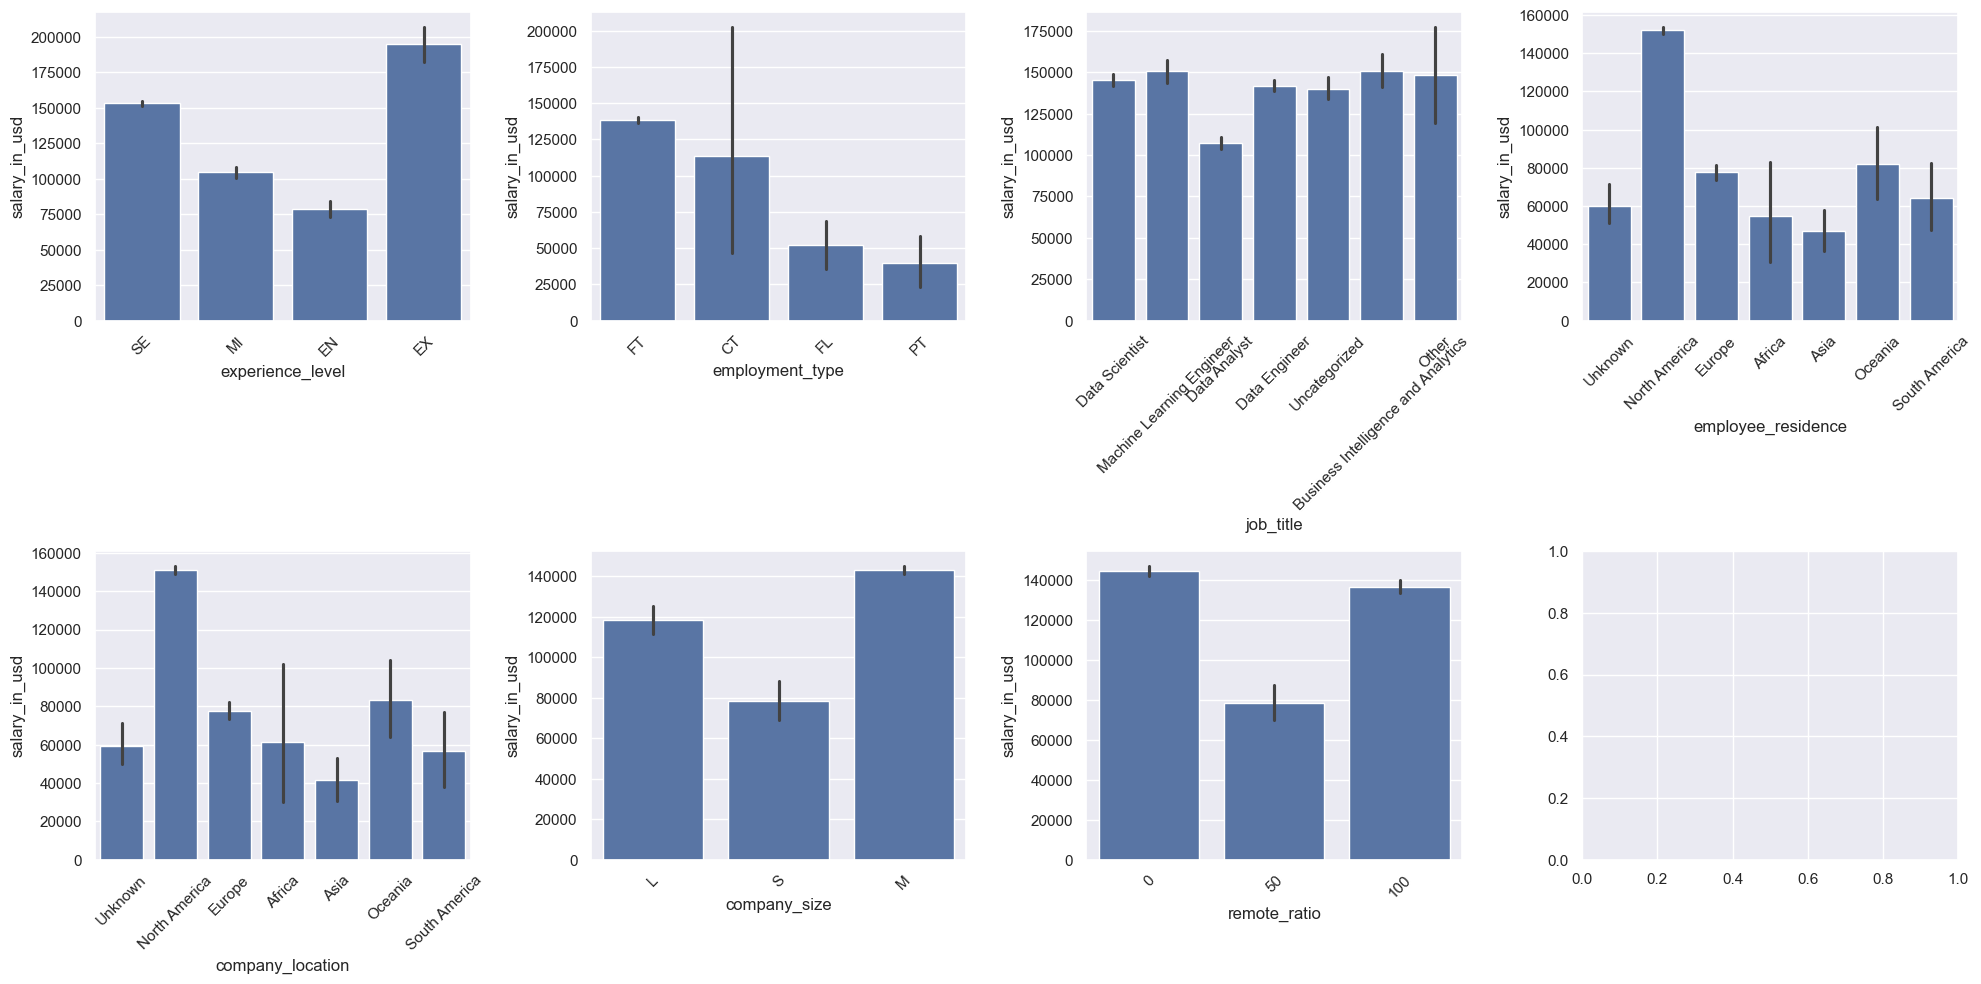

In [25]:
# list of categorical variable to plot
cat_var = ['experience_level','employment_type','job_title','employee_residence','company_location','company_size','remote_ratio']

# create figure with sub plots
fig, axs = plt.subplots(nrows=2,ncols=4, figsize=(20,10))
axs = axs.flatten()

# create bar plot for each categorical variable
for i,var in enumerate(cat_var):
    sns.barplot(x=var, y='salary_in_usd', data=df, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)


# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()    

C:\Users\Shehan\AppData\Local\Temp\ipykernel_30452\1341879357.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='work_year', y='salary_in_usd', hue='job_title', data=df, ci=None, estimator='mean')


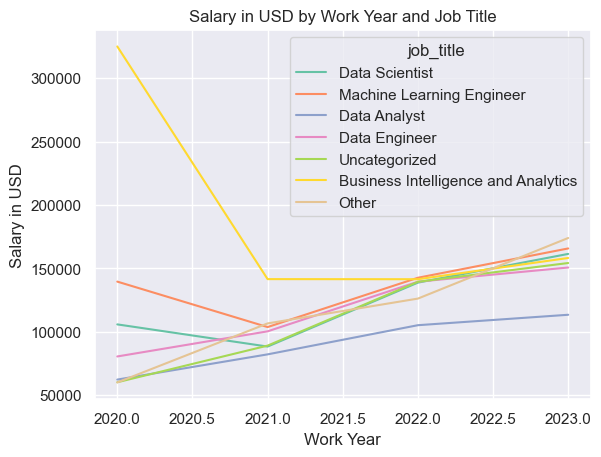

<Figure size 2000x1000 with 0 Axes>

In [30]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.lineplot(x='work_year', y='salary_in_usd', hue='job_title', data=df, ci=None, estimator='mean')

plt.title("Salary in USD by Work Year and Job Title")
plt.xlabel("Work Year")
plt.ylabel("Salary in USD")

plt.show()

# label encoding for object data types

In [31]:
# loop for each column in the data frame where dtypes is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

experience_level: ['SE' 'MI' 'EN' 'EX']
employment_type: ['FT' 'CT' 'FL' 'PT']
job_title: ['Data Scientist' 'Machine Learning Engineer' 'Data Analyst'
 'Data Engineer' 'Uncategorized' 'Business Intelligence and Analytics'
 'Other']
employee_residence: ['Unknown' 'North America' 'Europe' 'Africa' 'Asia' 'Oceania'
 'South America']
company_location: ['Unknown' 'North America' 'Europe' 'Africa' 'Asia' 'Oceania'
 'South America']
company_size: ['L' 'S' 'M']


In [35]:
from sklearn import preprocessing

# loop over each column in the data frame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # initialize a label encoder object
    le = preprocessing.LabelEncoder()

    # fit the encoder to the unique values in the column
    le.fit(df[col].unique())

    # transform the column using the encoder
    df[col] = le.transform(df[col])

    # print the column and the unique encoded values
    print(f"{col}: {df[col].unique()}")

experience_level: [3 2 0 1]
employment_type: [2 0 1 3]
job_title: [3 4 1 2 6 0 5]
employee_residence: [6 3 2 0 1 4 5]
company_location: [6 3 2 0 1 4 5]
company_size: [0 2 1]


In [36]:
df.dtypes

work_year             int64
experience_level      int32
employment_type       int32
job_title             int32
salary_in_usd         int64
employee_residence    int32
remote_ratio          int64
company_location      int32
company_size          int32
dtype: object

<Axes: >

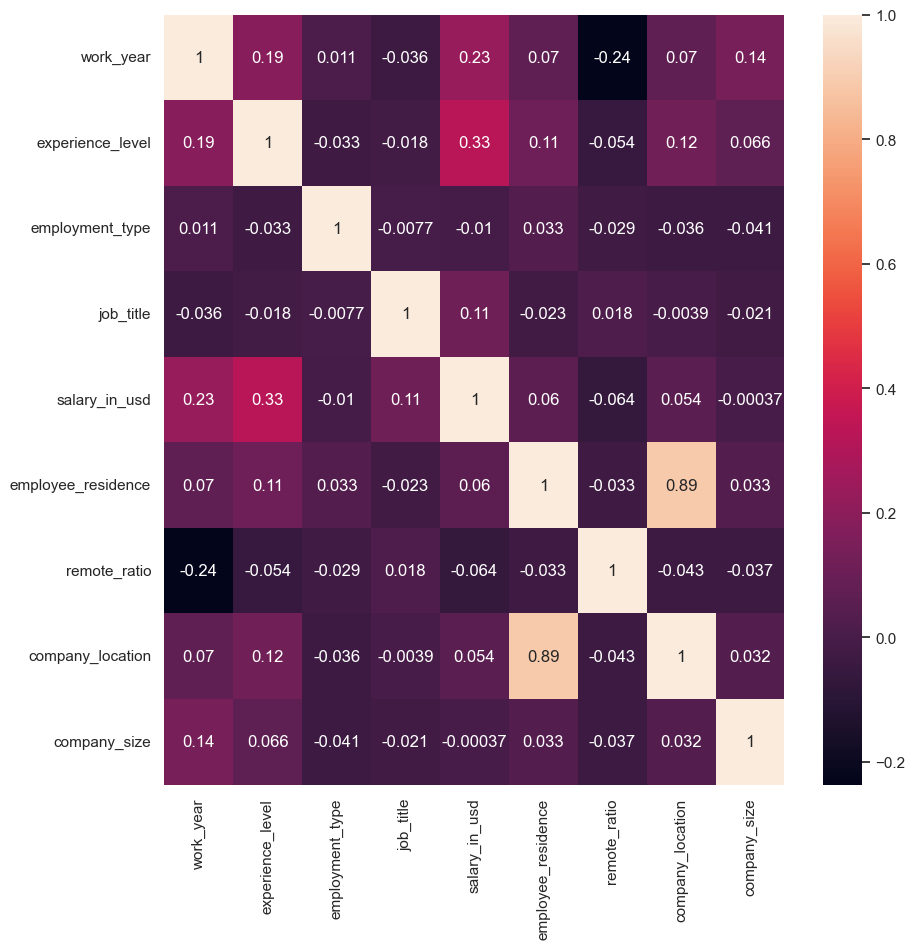

In [39]:
# correlation Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

# Train Test Split

In [40]:
X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']

In [47]:
# test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Decision Tree Regressor

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 4}


C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
320 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Shehan\anaconda3\Lib\site-p

In [53]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0, max_depth=8, max_features='log2',min_samples_leaf=2, min_samples_split=4)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, max_features='log2', min_samples_leaf=2,
                      min_samples_split=4, random_state=0)

In [52]:

y_pred = dtree.predict(X_test)

In [54]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 39705.34485440992
MAPE is 0.3808030969578159
MSE is 2970032881.0410295
R2 score is 0.30387934616232926
RMSE score is 54498.008046542665


# Feature Importance

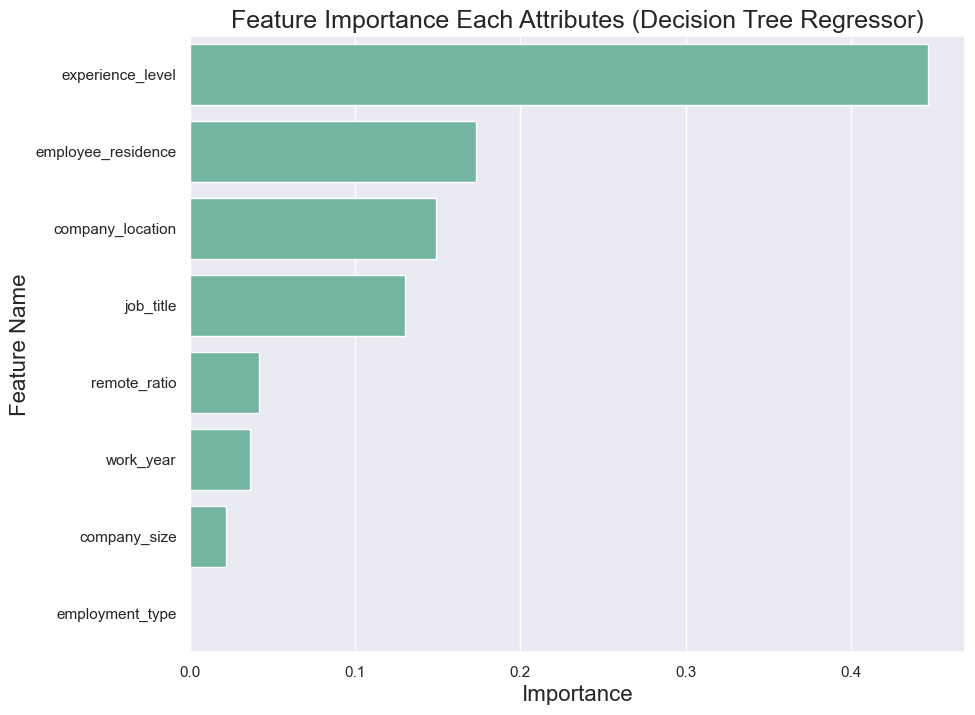

In [55]:
imp_df = pd.DataFrame({
    'Feature Name': X_train.columns,
    'Importance': dtree.feature_importances_
})
fi = imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

# Random Forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}


C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Shehan\anaconda3\Lib\site-p

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0, max_depth=9, min_samples_split=10, min_samples_leaf=1, 
                           max_features='sqrt')
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, max_features='sqrt', min_samples_split=10,
                      random_state=0)

In [59]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 39157.55573710513
MAPE is 0.3872050094891335
MSE is 2804876757.937353
R2 score is 0.34258888003116916
RMSE score is 52961.08720501641


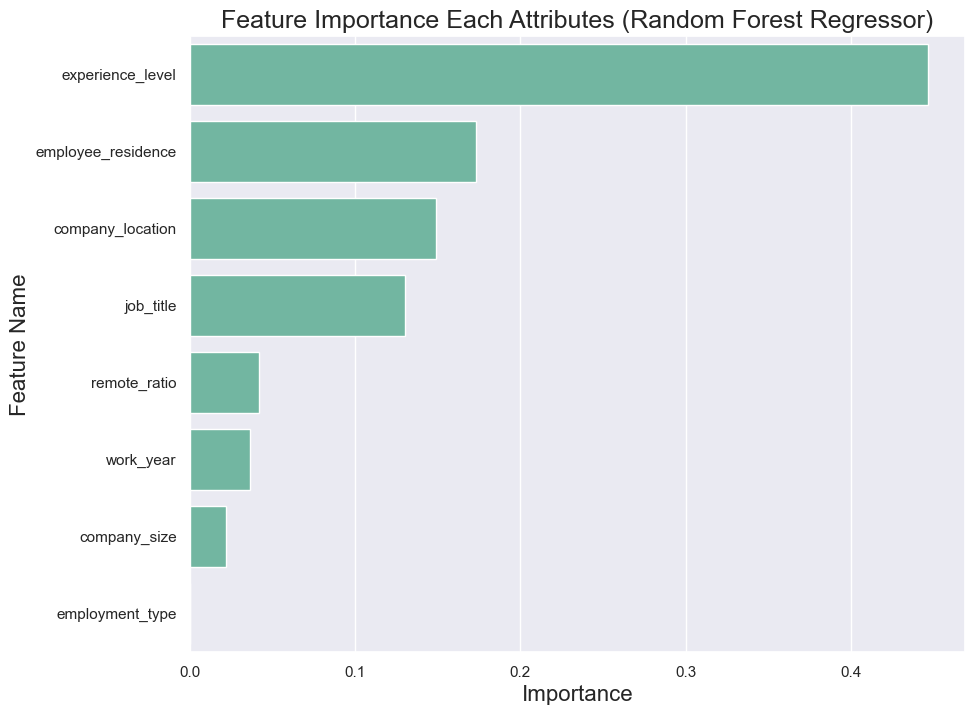

In [60]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()